## Covid-19's positive test in France
### After the first lockdown 
##### May-Septembre 2020

**The purpose of this project is to visualize Covid-19 positives tests per region on the France's map using tow packages Geopandas&Folium and Plotly**

##### Packages 

In [47]:
import pandas as pd
import datetime
import geopandas as gpd
import json
import folium 
import plotly
import plotly.express as px

#### Datasets and data preprocessing

For more information about data and geodata you can visite the France open data plateform : https://www.data.gouv.fr/fr/datasets/ 

We had chosen for this project, the data for the period after the first lockdown ( between May and Septembre 2020)

In [48]:
# Import the dataset
df_test_covid = pd.read_csv('sp-pos-quot-reg-2020-09-08-19h15.csv', sep = ';')
df_test_covid.head()

reg        jour  P_f  P_h  P  T_f  T_h  T  cl_age90
0    1  2020-05-13    0    0  0    0    0  0         9
1    1  2020-05-13    0    0  0    1    0  1        19
2    1  2020-05-13    0    0  0    1    0  1        29
3    1  2020-05-13    0    0  0    5    1  6        39
4    1  2020-05-13    0    0  0    2    1  3        49

In [49]:
df_test_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26796 entries, 0 to 26795
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg       26796 non-null  int64 
 1   jour      26796 non-null  object
 2   P_f       26796 non-null  int64 
 3   P_h       26796 non-null  int64 
 4   P         26796 non-null  int64 
 5   T_f       26796 non-null  int64 
 6   T_h       26796 non-null  int64 
 7   T         26796 non-null  int64 
 8   cl_age90  26796 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 1.8+ MB



**The columns' description is given as follows :**

- **reg**: Region code
- **jour** : Date
- **P_f** : Number of women tested positive
- **P_h** : Number of man tested positive
- **P** : total number of positive test
- **T_f** : Number of test taken by women
- **T_h**: Number of test taken by men
- **T** : total number of covid test taken 
- **cl_age90** : age group


The date column ('jour') is an object type, we should convert it to datetime type

In [50]:
df_test_covid['jour'] = pd.to_datetime(df_test_covid['jour'], format = '%Y/%m/%d')
df_test_covid['jour'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26796 entries, 0 to 26795
Series name: jour
Non-Null Count  Dtype         
--------------  -----         
26796 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 209.5 KB


In [51]:
print('The period is from', df_test_covid.jour.min().date(), 'to', df_test_covid.jour.max().date())

The period is from 2020-05-13 to 2020-09-05


Now we need the region name and their geographical data.

So, we import a json file using Geopandas package

In [52]:
geo_reg_fr = gpd.read_file("a-reg2020-geojson.json")
geo_reg_fr

reg                      libgeo  \
0   84        Auvergne-Rhône-Alpes   
1   32             Hauts-de-France   
2   93  Provence-Alpes-Côte d'Azur   
3   44                   Grand-Est   
4   76                   Occitanie   
5   28                   Normandie   
6   75          Nouvelle Aquitaine   
7   24         Centre-Val de Loire   
8   27     Bourgogne-Franche-Comté   
9   53                    Bretagne   
10  94                       Corse   
11  52            Pays de la Loire   
12  11               Île-de-France   
13  01                  Guadeloupe   
14  02                  Martinique   
15  03                      Guyane   
16  04                  La Réunion   
17  06                     Mayotte   

                                             geometry  
0   POLYGON ((4.78045 46.17691, 4.77549 46.17718, ...  
1   POLYGON ((3.48502 48.85185, 3.48687 48.85735, ...  
2   MULTIPOLYGON (((5.49889 44.11605, 5.49447 44.1...  
3   POLYGON ((4.04823 49.40563, 4.04796 49.40419, ...  
4   MULTIPOLYGON (((1.78614 42.57367, 1.78045 42.5...  
5   POLYGON ((-1.14028 49.30876, -1.13761 49.31216...  
6   MULTIPOLYGON (((-1.15741 46.02151, -1.16241 46...  
7   POLYGON ((2.28109 46.42047, 2.27925 46.42325, ...  
8   POLYGON ((4.29280 47.92588, 4.28830 47.92709, ...  
9   MULTIPOLYGON (((-2.99788 48.84602, -2.99447 48...  
10  POLYGON ((9.40182 41.85957, 9.39883 41.86501, ...  
11  MULTIPOLYGON (((-1.97554 47.02884, -1.98192 47...  
12  POLYGON ((2.59030 49.07990, 2.58298 49.08066, ...  
13  MULTIPOLYGON (((-4.53306 42.05038, -4.53118 42...  
14  POLYGON ((-2.85891 41.73345, -2.85371 41.73518...  
15  POLYGON ((-1.03711 42.20927, -1.04027 42.21156...  
16  POLYGON ((-0.20593 41.79716, -0.20081 41.79483...  
17  MULTIPOLYGON (((1.09707 42.01754, 1.10786 42.0...

In [53]:
geo_reg_fr.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   reg       18 non-null     object  
 1   libgeo    18 non-null     object  
 2   geometry  18 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 560.0+ bytes


The reg column in geo_reg_fr data frame is an object type while it is a integer type in df_test_covid.

To recognize the same key, we need to convert the reg column of geo_reg_fr dataframe to integer type

In [54]:
geo_reg_fr['reg'] = pd.to_numeric(geo_reg_fr['reg'])
geo_reg_fr['reg'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18 entries, 0 to 17
Series name: reg
Non-Null Count  Dtype
--------------  -----
18 non-null     int64
dtypes: int64(1)
memory usage: 272.0 bytes


- The geo_reg_fr data frame has 18 regions, while the df_test_covid dataframe has 21 regions ( including Metropolitan France and Overseas () regions)

In [55]:
print(df_test_covid.reg.nunique())
print(df_test_covid.reg.unique())

21
[ 1  2  3  4  5  6  7  8 11 24 27 28 32 44 52 53 75 76 84 93 94]


So, we select only regions that not have the following code : 5, 7 and 8 (because we don't have more information about it)

We select also the Metropolitaine France's regions 

In [57]:
df_test_covid = df_test_covid[~df_test_covid['reg'].isin([1,2,3,4,5,6,7,8])]
# we don't need for the moment the column cl_age90
df_test_covid.drop(df_test_covid[df_test_covid.cl_age90 == 0].index, axis = 0, inplace = True)

# select only the Metropolitaine France's regions in geo_reg_fr data frame
geo_reg_fr = geo_reg_fr.iloc[:13]

To visualise the positive tests per region, we need to group the sum up the numbers of tests over the whole periode

In [58]:
positive_test_reg = df_test_covid[['reg','P_f', 'P_h', 'P', 'T_f', 'T_h', 'T']].groupby('reg').sum()
positive_test_reg

P_f    P_h      P     T_f     T_h        T
reg                                              
11   27967  27070  55383  815798  697696  1523924
24    2437   2151   4597  120168  101118   222082
27    2066   1901   4001  141159  117401   262507
28    2280   2099   4411  162554  133078   299197
32    7076   6508  13780  304295  257147   571977
44    5032   4544   9695  327855  278256   619300
52    4018   4044   8142  201955  168678   377715
53    2214   2426   4654  155093  134394   290966
75    5501   5538  11078  280218  238062   522519
76    7083   6985  14151  326906  276926   608621
84    8955   8578  17640  384680  328853   718701
93   13273  12718  26146  401454  338509   752215
94     293    367    663   20746   18526    39539

### Visualize the map with Folium 

In [59]:
# Create the France map
m = folium.Map(location = [46,2], zoom_start = 6)
# Add a choropleth map to the base map
folium.Choropleth(geo_data=geo_reg_fr.__geo_interface__,
                  data=positive_test_reg[['P']].squeeze(),
                  key_on="feature.properties.reg", 
                  fill_color = 'Reds',
                  legend_name='Positive COVID_19 test in France (May-Sep 2020)').add_to(m)
m

### Visualize the map with Plotly

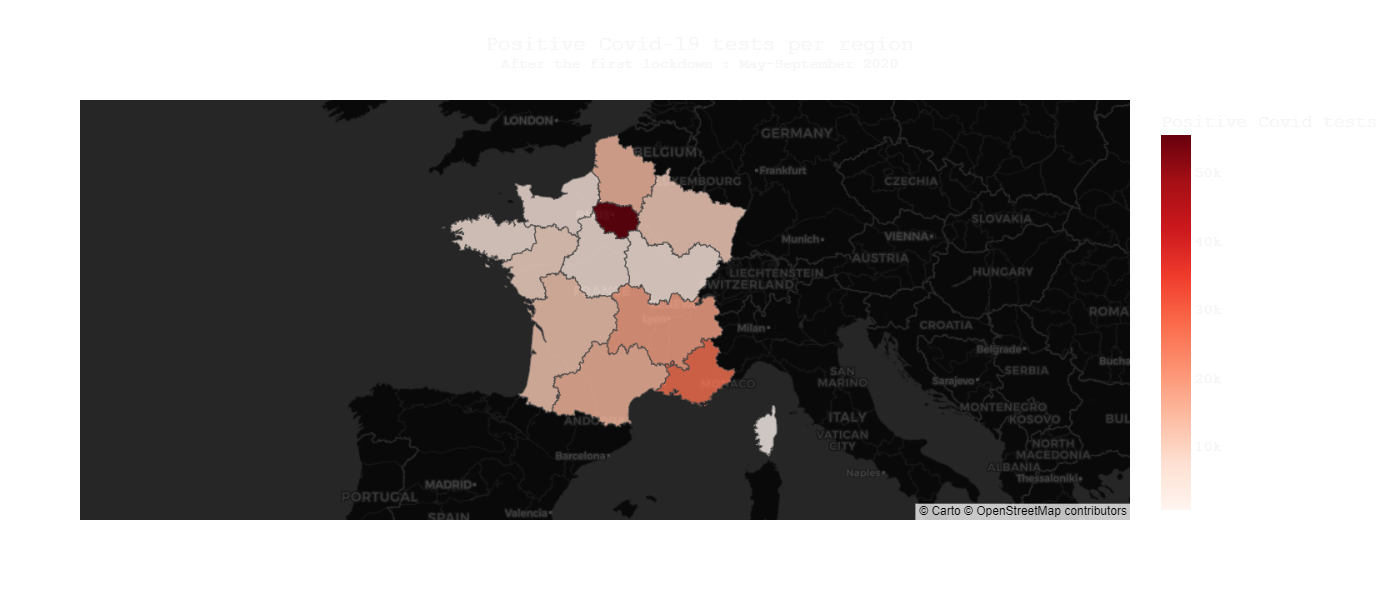

In [60]:
# Get region name from geo_reg_fr data frame
positive_test_reg_name = geo_reg_fr.join(positive_test_reg, on = 'reg').drop('geometry', axis = 1).rename(columns = {'libgeo' : 'reg_name'})
# Create map with plotly using choropleth_mapbox
fig = px.choropleth_mapbox(positive_test_reg_name, geojson=geo_reg_fr, color= 'P',
                           locations="reg", featureidkey="properties.reg",
                           center={"lat": 46, "lon": 2},
                           mapbox_style='carto-darkmatter', 
                           zoom = 4,
                           hover_name= "reg_name",
                           hover_data= ['P', 'P_f', 'P_h'],
                           labels={'P':'Positive Covid tests',
                                  'P_f' : 'Positive test_Women',
                                  'P_h': 'positive test_Men'},
                           color_continuous_scale = 'Reds',
                           opacity  = 0.8,
                           title="Positive Covid-19 tests per region<br><sup>After the first lockdown : May-September 2020</sup>"
                          )

fig.update_layout(title_x=0.5, 
                  font=dict(family = 'Courier New',size = 15, color = 'whitesmoke'),
                  paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
                  width = 1000 , height  = 600)

### Visualize positives tests per gender of Île-de-France region with plotly (Pie chart)

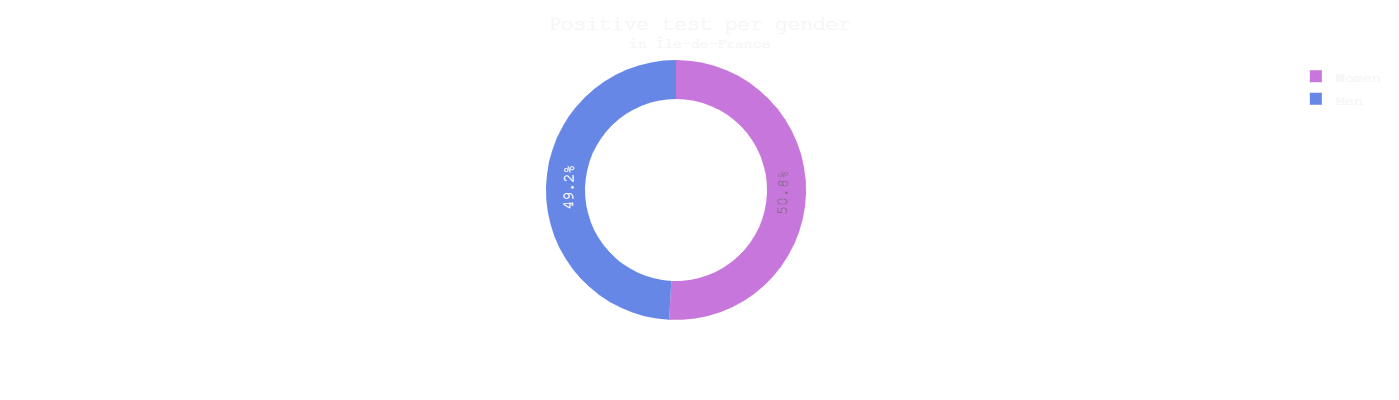

In [68]:
# get the information of Île-de-France region ( reg_code = 11)
data = positive_test_reg_name[positive_test_reg_name['reg'] == 11] 
# melt the data frame
data = data[['P_f', 'P_h']].melt()
# Rename variables
data['variable'] = ['Women', 'Men']

# Create the pie chart 
fig = px.pie(data, values='value', names='variable', color = 'variable',
         opacity = 0.8,
         color_discrete_map = {'Women' :'mediumorchid', 'Men' : 'royalblue'},
         hole=.7
        ) 
fig.update_layout(title_text = f'Positive test per gender<br><sup>in Île-de-France</sup>',
              title_x=0.5, 
              font=dict(family = 'Courier New',size = 15, color = 'whitesmoke'),
              paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
              width = 600 , height  = 400)
        